# Análise de Características das Músicas populares ao longo do tempo

Esse notebbok possui o objetivo de, a partir de músicas de diferentes épocas (década de 50 até os dias de hoje), analisar a evolução de características ao longo do tempo.

In [ ]:
!pip install ipython-autotime
%load_ext autotime
!pip install spotipy

     |████████████████████████████████| 138 kB 6.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
time: 5.24 s (started: 2022-05-11 01:07:17 +00:00)


In [3]:
import spotipy
import pandas as pd
import re
from tqdm import tqdm # tqdm mostra barra de processo https://github.com/tqdm/tqdm
from spotipy.oauth2 import SpotifyClientCredentials

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: ignored

### Credenciais para API Spotify

In [ ]:
# Usuário: fijita8647@karavic.com
# Senha: INF10322803
cid ="" 
secret = ""

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

time: 3.33 ms (started: 2022-05-05 21:17:17 +00:00)


# Geração do dataset a ser utilizado

**Atenção:** caso esse dataset já tenha sido gerado, não é necessário executar esta parte inicial do notebook, pois ela constroi o dataset a partir da API e sua execução leva tempo. Podemos partir para a importação do dataset, caso ele esteja pronto.


In [ ]:
lista_uris = []
decada_20 = ["spotify:playlist:2fmTTbBkXi8pewbUvG3CeZ","spotify:playlist:5GhQiRkGuqzpWZSE7OU4Se"]
decada_10 = ["spotify:playlist:37i9dQZF1DX1Z27nCI3DU6","spotify:playlist:37i9dQZF1DX1lLhvjOZ9Eb","spotify:playlist:37i9dQZF1DX8cr9zdmLTqV","spotify:playlist:37i9dQZF1DWUuUULr6s2Iv","spotify:playlist:37i9dQZF1DX86diBZjYU2q","spotify:playlist:37i9dQZF1DWYrFu9Z9AClE","spotify:playlist:37i9dQZF1DX310u4B4JgpY","spotify:playlist:37i9dQZF1DWYiJqIRRqjB2","spotify:playlist:37i9dQZF1DX3cJs3IHo3oI"]
decada_00 = ["spotify:playlist:37i9dQZF1DXbdJsJCLgPgj","spotify:playlist:37i9dQZF1DWZmtrk33btOM","spotify:playlist:37i9dQZF1DX6pidNhUl3IN","spotify:playlist:37i9dQZF1DXbdY3N3Ucej4","spotify:playlist:37i9dQZF1DWVCpK5SVqe66","spotify:playlist:37i9dQZF1DXarC0Cy7VsAl","spotify:playlist:37i9dQZF1DX5c42vvWQbfU","spotify:playlist:37i9dQZF1DXczJmqUuGWmO","spotify:playlist:37i9dQZF1DX5uCG9BwFjow","spotify:playlist:37i9dQZF1DXaCUs0UpSRYo","spotify:playlist:37i9dQZF1DWVN7yvDyMXUI"]
decada_90 = ["spotify:playlist:37i9dQZF1DX4joPVMjBCAo","spotify:playlist:37i9dQZF1DX6TtJfRD994c","spotify:playlist:37i9dQZF1DX9ZZCtVNwklG","spotify:playlist:37i9dQZF1DXbUFx5bcjwWK","spotify:playlist:37i9dQZF1DXbKFudfYGcmj","spotify:playlist:37i9dQZF1DXayIOFUOVODK","spotify:playlist:37i9dQZF1DWZkDl55BkJmo","spotify:playlist:37i9dQZF1DWWKd15PHZNnl","spotify:playlist:37i9dQZF1DWWmGB2u14f8m","spotify:playlist:37i9dQZF1DX4PrR66miO50"]
decada_80 = ["spotify:playlist:37i9dQZF1DWXbLOeOIhbc5","spotify:playlist:37i9dQZF1DX3MaR62kDrX7","spotify:playlist:37i9dQZF1DXas7qFgKz9OV","spotify:playlist:37i9dQZF1DXbE3rNuDfpVj","spotify:playlist:37i9dQZF1DX2O7iyPnNKby","spotify:playlist:37i9dQZF1DWXZ5eJ1sVtmf","spotify:playlist:37i9dQZF1DX7b12kdMQTpG","spotify:playlist:37i9dQZF1DX38yySwWsFRT","spotify:playlist:37i9dQZF1DX3MZ9dVGvZnZ","spotify:playlist:37i9dQZF1DX4qJrOCfJytN"]
decada_70 = ["spotify:playlist:37i9dQZF1DWXQyLTHGuTIz","spotify:playlist:37i9dQZF1DX43B4ApmA3Ee","spotify:playlist:37i9dQZF1DXaQBa5hAMckp","spotify:playlist:37i9dQZF1DX2ExTChOnD3g","spotify:playlist:37i9dQZF1DWVg6L7Yq13eC","spotify:playlist:37i9dQZF1DX3TYyWu8Zk7P","spotify:playlist:37i9dQZF1DX6rhG68uMHxl","spotify:playlist:37i9dQZF1DX26cozX10stk","spotify:playlist:37i9dQZF1DX0fr2A59qlzT","spotify:playlist:37i9dQZF1DWZLO9LcfSmxX"]
decada_60 = ["spotify:playlist:37i9dQZF1DXaKIA8E7WcJj","spotify:playlist:37i9dQZF1DWWzBc3TOlaAV","spotify:playlist:37i9dQZF1DX5qNE4zrflL7","spotify:playlist:37i9dQZF1DWYzKmy0vGGcY","spotify:playlist:37i9dQZF1DX3AdAEX3vkB1"]
decada_50 = ["spotify:playlist:37i9dQZF1DWSV3Tk4GO2fq","spotify:playlist:37i9dQZF1DWXcg95telZlE","spotify:playlist:37i9dQZF1DWSwFS0Z6E1ep","spotify:playlist:37i9dQZF1DWUGhrXBsyMVJ"]

lista_uris.extend(decada_20)
lista_uris.extend(decada_10)
lista_uris.extend(decada_00)
lista_uris.extend(decada_90)
lista_uris.extend(decada_80)
lista_uris.extend(decada_70)
lista_uris.extend(decada_60)
lista_uris.extend(decada_50)


time: 41.3 ms (started: 2022-05-01 21:15:08 +00:00)


A função abaixo retira, da informação da playlist, uma lista com os URIs de todas as músicas da playlist.

In [ ]:
def get_tracks_from_playlist(playlist_id):
  playlist = sp.playlist_tracks(playlist_id=playlist_id)
  lista_uris_tracks = []
  for item in playlist['items']:
    lista_uris_tracks.append(item['track']['uri'])
  return lista_uris_tracks

time: 2.02 ms (started: 2022-05-01 21:15:25 +00:00)


A função abaixo, por sua ver, retira as audio_features de uma música com id = track_id

In [ ]:
def get_features_from_tracks(track_id):
  #Pega as features da musica e outras informações importantes e/ou interessantes
  features = sp.audio_features(track_id)
  data_lancamento = sp.track(track_id)['album']['release_date']
  nome = sp.track(track_id)['name']
  features = pd.DataFrame(features)

  features["nome"] = nome
  features["data_lancamento"] = data_lancamento
  features["data_lancamento"] = pd.to_datetime(features["data_lancamento"])
  features["ano_lancamento"] = features["data_lancamento"].dt.year
  
  return features

time: 27.2 ms (started: 2022-05-01 21:15:30 +00:00)


In [ ]:
def gera_dataset(lista_uris_playlist):
  df_features_final = pd.DataFrame()
  for playlist_uri in lista_uris_playlist:
    #Pegando, para cada playlist, uma lista de uris das musicas que compoem a playlist
    lista_tracks_uri = get_tracks_from_playlist(playlist_uri)
    #Para cada uma dessas musicas...
    for track_uri in lista_tracks_uri:
      #Eu pego as features da musica
      df_features_parcial = get_features_from_tracks(track_uri)
      # E concateno no df final
      df_features_final = pd.concat([df_features_final,df_features_parcial],axis=0)
  
  return df_features_final



time: 5.92 ms (started: 2022-05-01 21:15:32 +00:00)


A próxima célula leva, aproximadamente, 25 minutos para executar!

Apenas executá-la se houver alguma mudança no código das funções, pois o csv já está salvo no drive do projeto, dentro da pasta Dados

In [ ]:
df_features = gera_dataset(lista_uris)

time: 26min 33s (started: 2022-05-01 21:15:35 +00:00)


In [ ]:
#Salvando esse dataset para não precisarmos sempre fazer o acesso à API
path = '/content/drive/My Drive/INF1032 - Spotify/Dados/'
df_features.to_csv(path+'audio_features_temporal.csv')

time: 144 ms (started: 2022-05-01 21:45:43 +00:00)


In [ ]:
df_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,nome,data_lancamento,ano_lancamento,0
0,0.513,0.7960,1.0,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.345,...,0sf12qNH5qcw8qpgymFOqD,spotify:track:0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573.0,4.0,Blinding Lights,2019-11-29,2019,NaN
0,0.548,0.8160,0.0,-4.209,1.0,0.0465,0.12200,0.000000,0.3350,0.557,...,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000.0,4.0,Watermelon Sugar,2019-12-13,2019,NaN
0,0.730,0.7290,4.0,-3.434,0.0,0.0886,0.16700,0.000001,0.3490,0.467,...,1raaNykBg1bDnWENUiglUA,spotify:track:1raaNykBg1bDnWENUiglUA,https://api.spotify.com/v1/tracks/1raaNykBg1bD...,https://api.spotify.com/v1/audio-analysis/1raa...,221820.0,4.0,Break My Heart,2020-03-25,2020,NaN
0,0.787,0.6730,11.0,-4.583,0.0,0.1590,0.26400,0.000003,0.0904,0.779,...,3Dv1eDb0MEgF93GpLXlucZ,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,https://api.spotify.com/v1/tracks/3Dv1eDb0MEgF...,https://api.spotify.com/v1/audio-analysis/3Dv1...,237893.0,4.0,Say So,2019-11-07,2019,NaN
0,0.736,0.8020,0.0,-4.759,1.0,0.0864,0.46800,0.000000,0.0940,0.675,...,7igeByaBM0MgGsgXtNxDJ7,spotify:track:7igeByaBM0MgGsgXtNxDJ7,https://api.spotify.com/v1/tracks/7igeByaBM0Mg...,https://api.spotify.com/v1/audio-analysis/7ige...,172325.0,4.0,positions,2020-10-23,2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.742,0.0899,9.0,-19.187,0.0,0.1580,0.09060,0.000000,0.1130,0.351,...,2CeqxyOZEyiL6pTDYZ9gPH,spotify:track:2CeqxyOZEyiL6pTDYZ9gPH,https://api.spotify.com/v1/tracks/2CeqxyOZEyiL...,https://api.spotify.com/v1/audio-analysis/2Ceq...,201333.0,4.0,Fever,1988-01-01,1988,NaN
0,0.670,0.2400,2.0,-12.158,0.0,0.0697,0.86300,0.000000,0.2310,0.578,...,7G2jAmiYUDZKyk7npVrgX8,spotify:track:7G2jAmiYUDZKyk7npVrgX8,https://api.spotify.com/v1/tracks/7G2jAmiYUDZK...,https://api.spotify.com/v1/audio-analysis/7G2j...,168893.0,4.0,Sh-Boom,1996-07-16,1996,NaN
0,0.260,0.2050,5.0,-16.618,0.0,0.0312,0.82100,0.001020,0.0740,0.313,...,4ydtQJImyQg6UDFFZBzgxp,spotify:track:4ydtQJImyQg6UDFFZBzgxp,https://api.spotify.com/v1/tracks/4ydtQJImyQg6...,https://api.spotify.com/v1/audio-analysis/4ydt...,150893.0,3.0,Cry Me A River,1959-02-19,1959,NaN
0,0.619,0.3520,9.0,-9.439,1.0,0.0322,0.71700,0.000000,0.0550,0.783,...,4BT0ShbzEpeo4j9JQWrfZk,spotify:track:4BT0ShbzEpeo4j9JQWrfZk,https://api.spotify.com/v1/tracks/4BT0ShbzEpeo...,https://api.spotify.com/v1/audio-analysis/4BT0...,128840.0,4.0,Heartbeat,2005-10-11,2005,NaN


time: 60.2 ms (started: 2022-05-01 21:48:30 +00:00)




---



# Análise das Audio Features ao longo do tempo

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para algumas analises de séries temporais
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, HoltWintersResults

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
path = '/content/drive/My Drive/INF1032 - Spotify/Dados/'
df_audio_features = pd.read_csv(path+'audio_features_temporal.csv')
df_audio_features['data_lancamento'] = pd.to_datetime(df_audio_features["data_lancamento"])
df_audio_features['duration_ms'] = df_audio_features['duration_ms']/(60*1000)
df_audio_features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,nome,data_lancamento,ano_lancamento,0
0,0,0.513,0.796,1.0,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,...,0sf12qNH5qcw8qpgymFOqD,spotify:track:0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,3.359550,4.0,Blinding Lights,2019-11-29,2019,NaN
1,0,0.548,0.816,0.0,-4.209,1.0,0.0465,0.12200,0.000000,0.3350,...,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,2.900000,4.0,Watermelon Sugar,2019-12-13,2019,NaN
2,0,0.730,0.729,4.0,-3.434,0.0,0.0886,0.16700,0.000001,0.3490,...,1raaNykBg1bDnWENUiglUA,spotify:track:1raaNykBg1bDnWENUiglUA,https://api.spotify.com/v1/tracks/1raaNykBg1bD...,https://api.spotify.com/v1/audio-analysis/1raa...,3.697000,4.0,Break My Heart,2020-03-25,2020,NaN
3,0,0.787,0.673,11.0,-4.583,0.0,0.1590,0.26400,0.000003,0.0904,...,3Dv1eDb0MEgF93GpLXlucZ,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,https://api.spotify.com/v1/tracks/3Dv1eDb0MEgF...,https://api.spotify.com/v1/audio-analysis/3Dv1...,3.964883,4.0,Say So,2019-11-07,2019,NaN
4,0,0.736,0.802,0.0,-4.759,1.0,0.0864,0.46800,0.000000,0.0940,...,7igeByaBM0MgGsgXtNxDJ7,spotify:track:7igeByaBM0MgGsgXtNxDJ7,https://api.spotify.com/v1/tracks/7igeByaBM0Mg...,https://api.spotify.com/v1/audio-analysis/7ige...,2.872083,4.0,positions,2020-10-23,2020,NaN


## Série Temporal das Features

In [39]:
serie_danceability = df_audio_features[["danceability","data_lancamento","ano_lancamento"]]
serie_energy = df_audio_features[["energy","data_lancamento","ano_lancamento"]]
serie_loudness = df_audio_features[["loudness","data_lancamento","ano_lancamento"]]
serie_speechiness = df_audio_features[["speechiness","data_lancamento","ano_lancamento"]]
serie_acousticness = df_audio_features[["acousticness","data_lancamento","ano_lancamento"]]
serie_instrumentalness = df_audio_features[["instrumentalness","data_lancamento","ano_lancamento"]]
serie_liveness = df_audio_features[["liveness","data_lancamento","ano_lancamento"]]
serie_valence = df_audio_features[["valence","data_lancamento","ano_lancamento"]]
serie_tempo = df_audio_features[["duration_ms","data_lancamento","ano_lancamento"]]

lista_series = [serie_danceability,serie_energy,serie_loudness,serie_speechiness,serie_acousticness,serie_instrumentalness,serie_liveness,serie_valence,serie_tempo]

#Gerando as listas para valores anuais médios e desvio padrão anual
lista_series_media = []
lista_series_std = []
for serie in lista_series:
  lista_series_media.append(serie.groupby(by="ano_lancamento").mean())
  lista_series_std.append(serie.groupby(by="ano_lancamento").std())

#Não preciso mais da informação do ano de lançamento
for i in range(len(lista_series)):
  serie = lista_series[i].drop(axis=1,columns=["ano_lancamento"])
  lista_series[i] = serie
  

In [40]:
#Informações para salvamento das imagens
path_img = "/content/drive/My Drive/INF1032 - Spotify/Dados/Matheus/AudioFeaturesTemporal/"

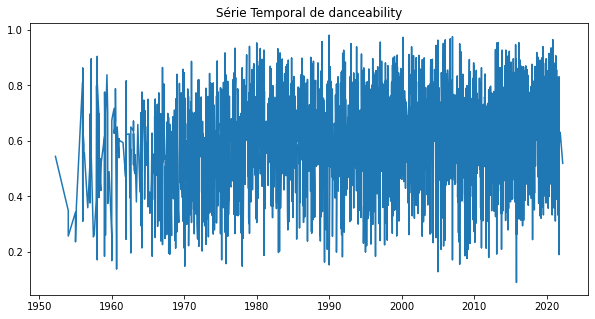

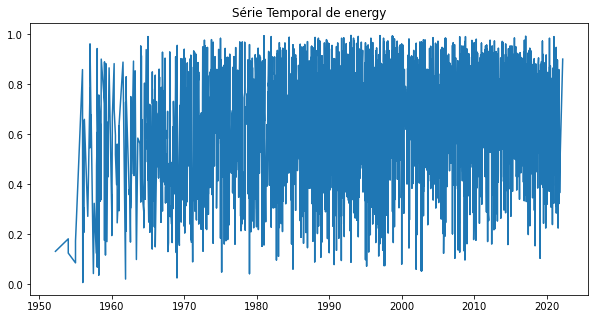

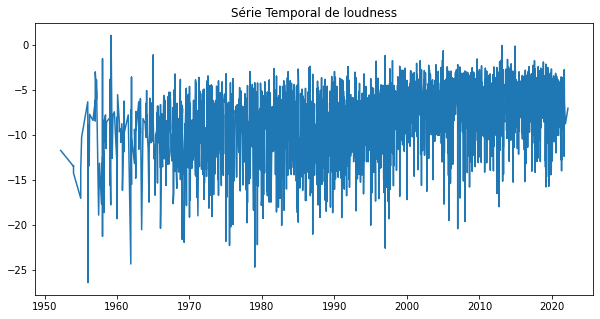

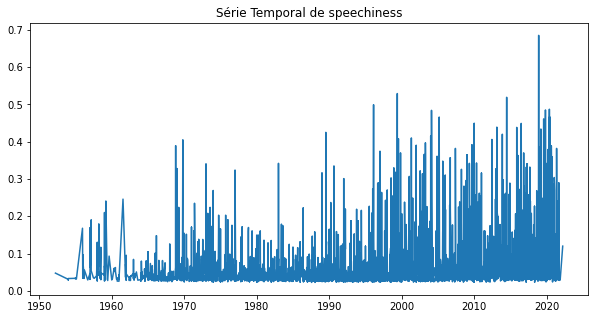

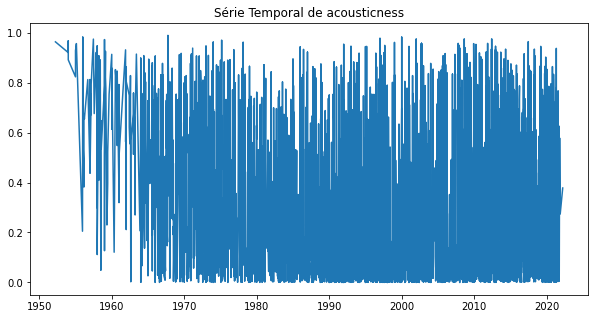

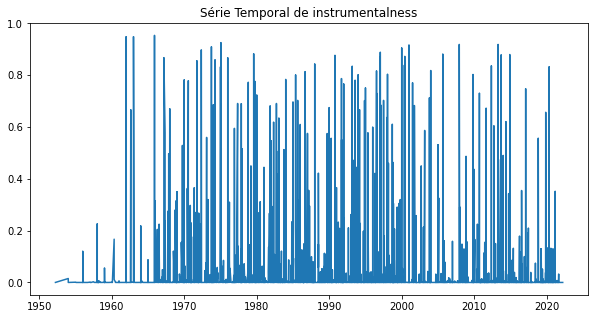

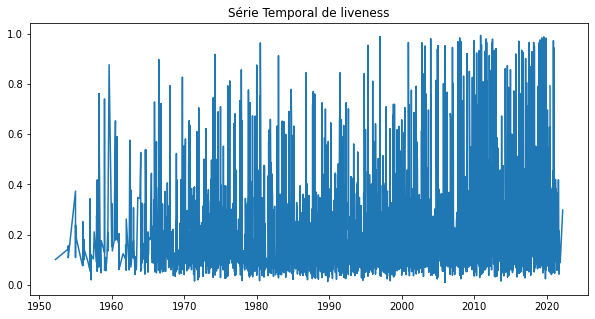

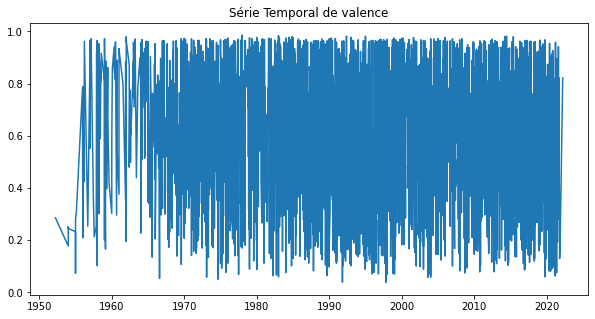

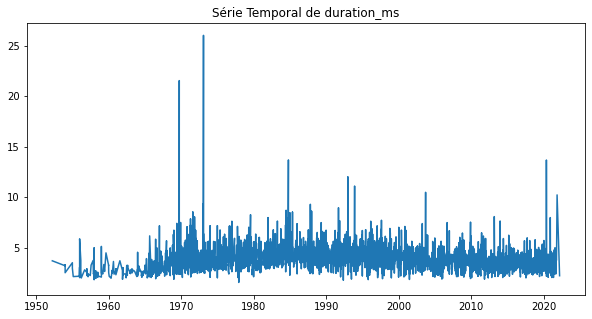

In [41]:
features_de_interesse = ["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","duration_ms"]
for serie in lista_series:
  #Aumentar tamanho da figura!!!!!!!!!!!
  serie = serie.sort_values(by="data_lancamento")
  feature = serie.columns[0]
  plt.figure(figsize=(10,5))
  plt.plot(serie["data_lancamento"],serie[feature])
  plt.title("Série Temporal de %s"%feature)

  #Salvando imagem na pasta de imagens do drive
  nome = "serie_original_" + feature + ".png"
  plt.savefig(path_img+nome)

## Série Temporal do valor médio das features por ano

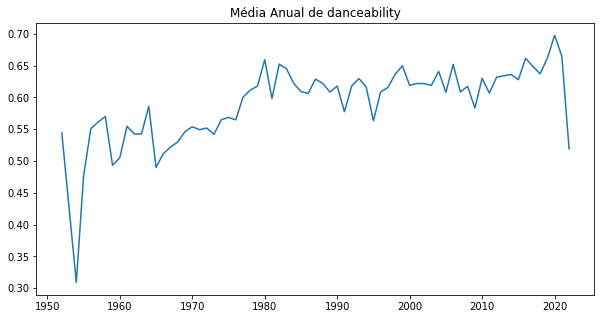

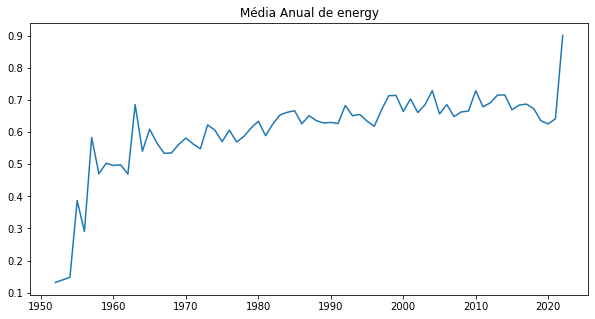

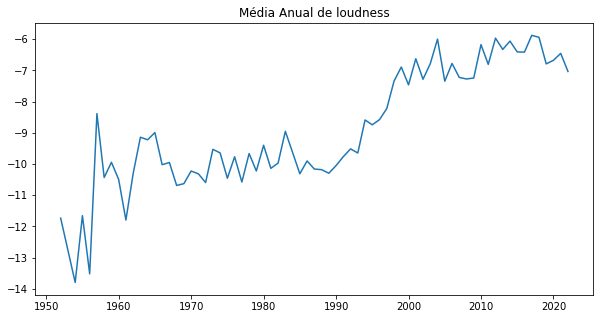

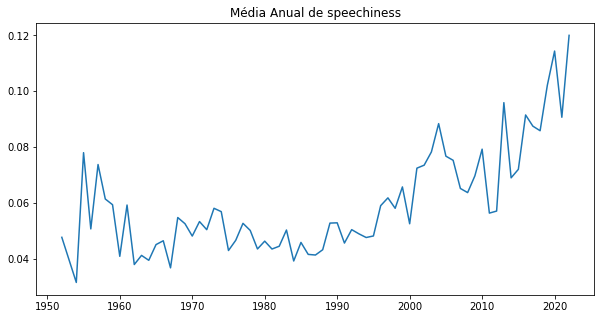

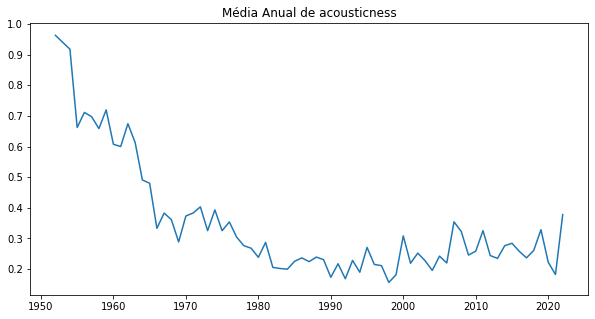

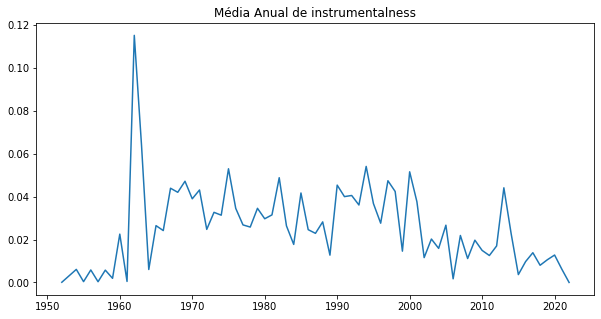

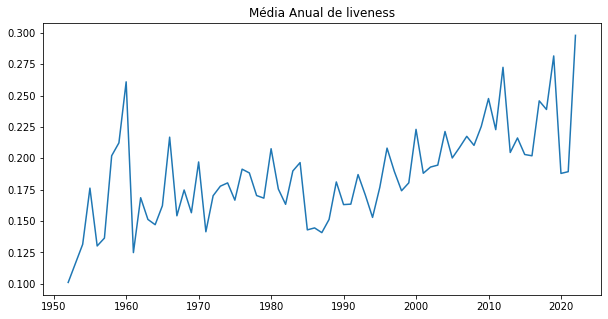

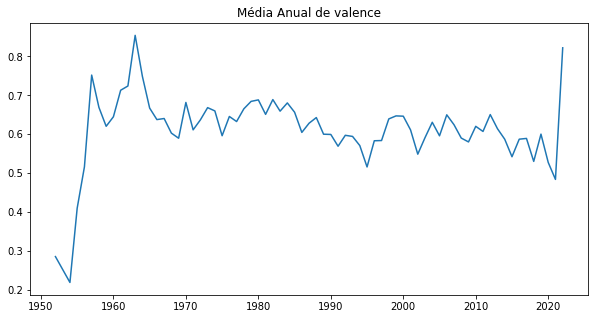

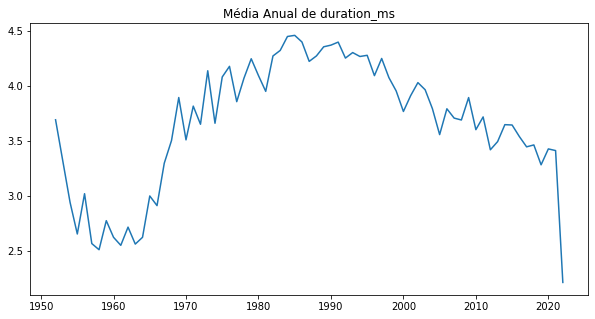

In [42]:
for serie in lista_series_media:
  
  serie = serie.sort_values(by="ano_lancamento")
  feature = serie.columns[0]

  #Plot
  plt.figure(figsize=(10,5))
  plt.plot(serie[feature])
  plt.title("Média Anual de %s"%feature)

  #Salvando imagem na pasta de imagens do drive
  nome = "serie_media_" + feature + ".png"
  plt.savefig(path_img+nome)


## Desvio Padrão Anual das Audio Features

Será que as músicas estão ficando com características mais parecidas (menor desvio padrão) ao longo do tempo?

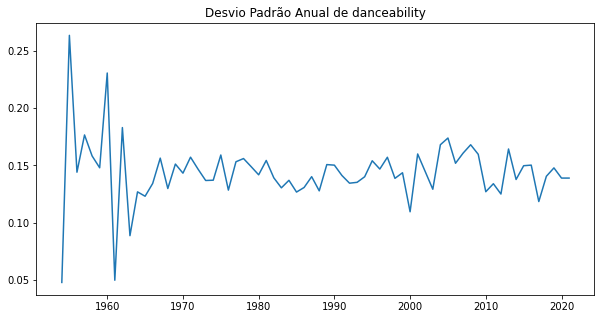

<Figure size 432x288 with 0 Axes>

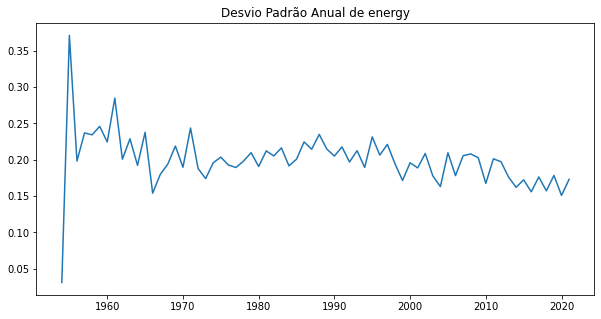

<Figure size 432x288 with 0 Axes>

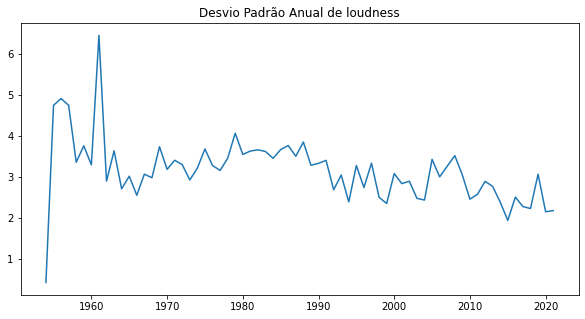

<Figure size 432x288 with 0 Axes>

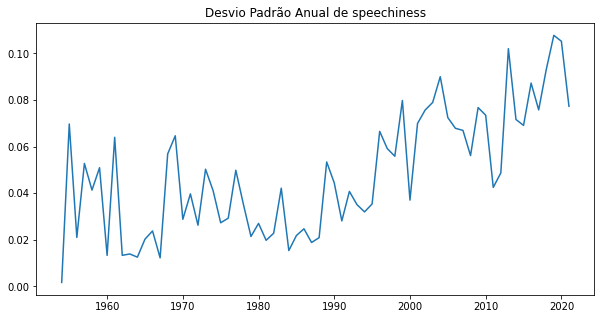

<Figure size 432x288 with 0 Axes>

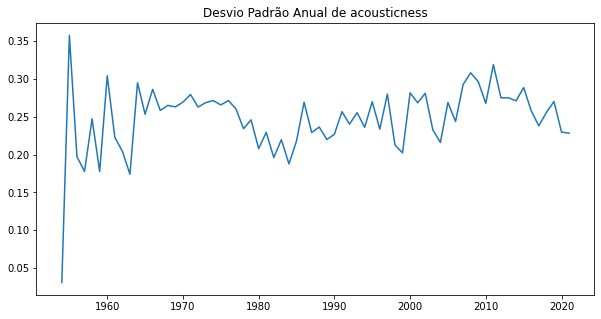

<Figure size 432x288 with 0 Axes>

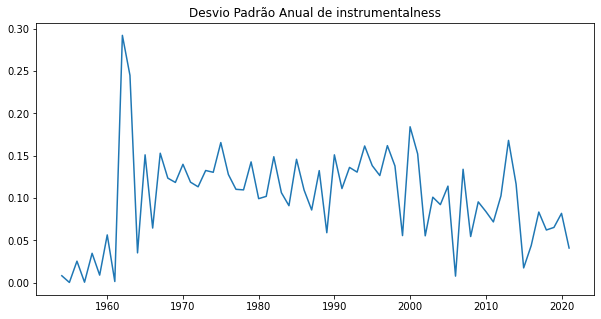

<Figure size 432x288 with 0 Axes>

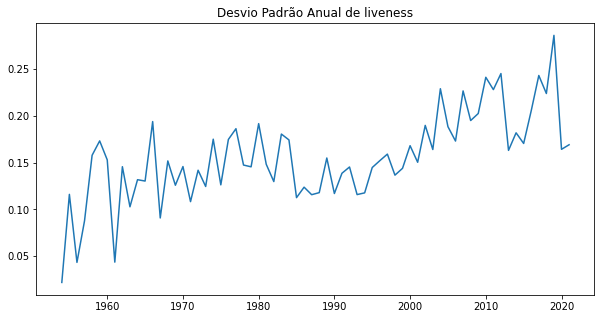

<Figure size 432x288 with 0 Axes>

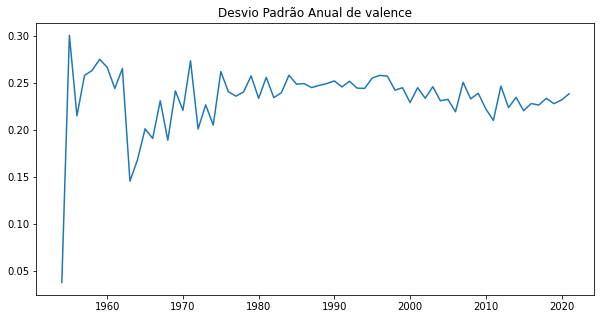

<Figure size 432x288 with 0 Axes>

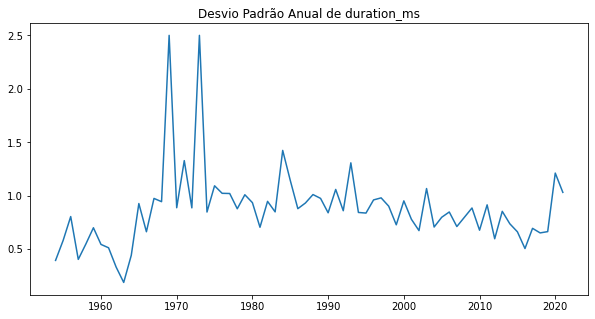

<Figure size 432x288 with 0 Axes>

In [43]:
for serie in lista_series_std:
  
  serie = serie.sort_values(by="ano_lancamento")
  feature = serie.columns[0]

  #Plot
  plt.figure(figsize=(10,5))
  plt.plot(serie[feature])
  plt.title("Desvio Padrão Anual de %s"%feature)
  plt.show()

  #Salvando imagem na pasta de imagens do drive
  nome = "serie_std_" + feature + ".png"
  plt.savefig(path_img+nome)


## Boxplot das features por ano

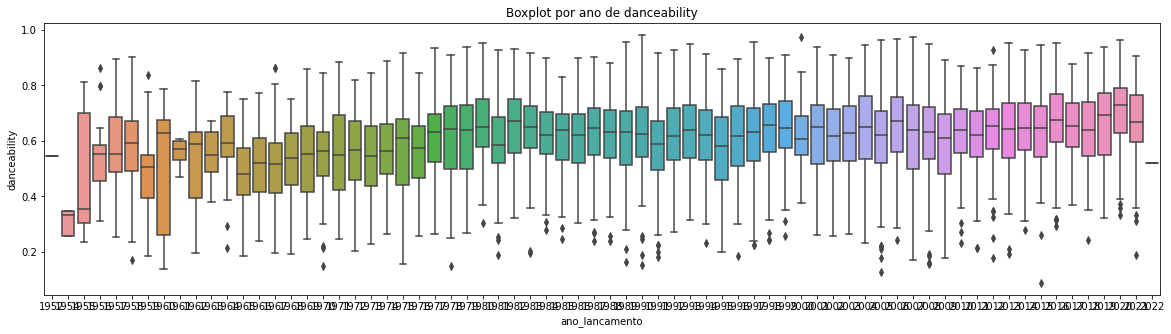

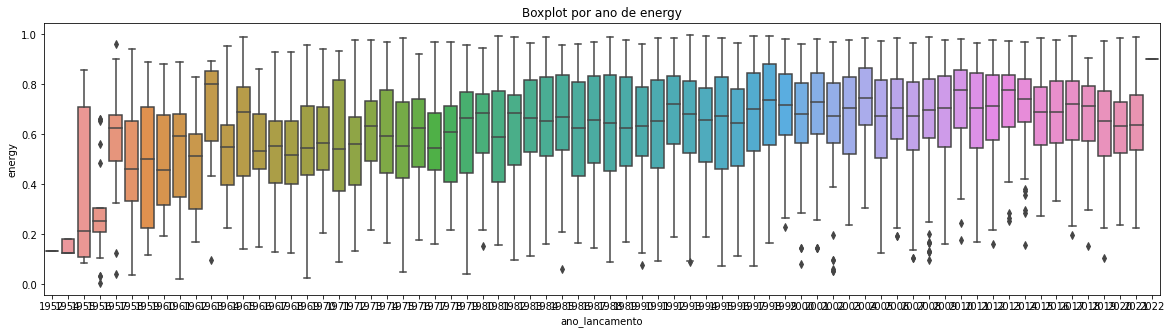

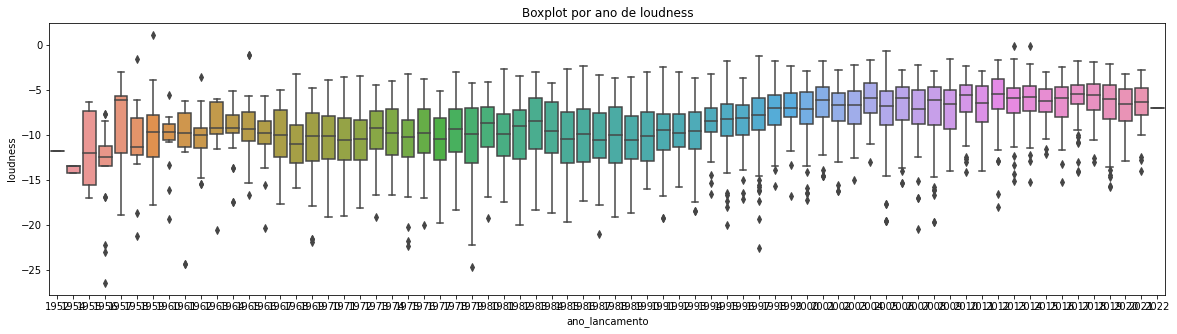

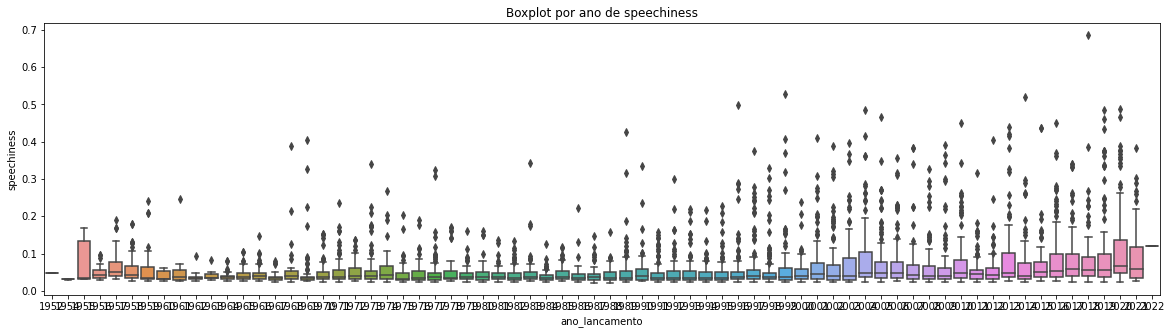

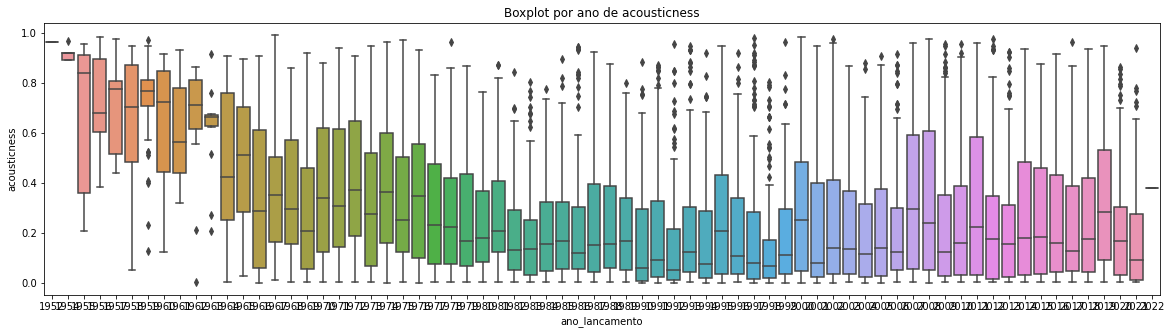

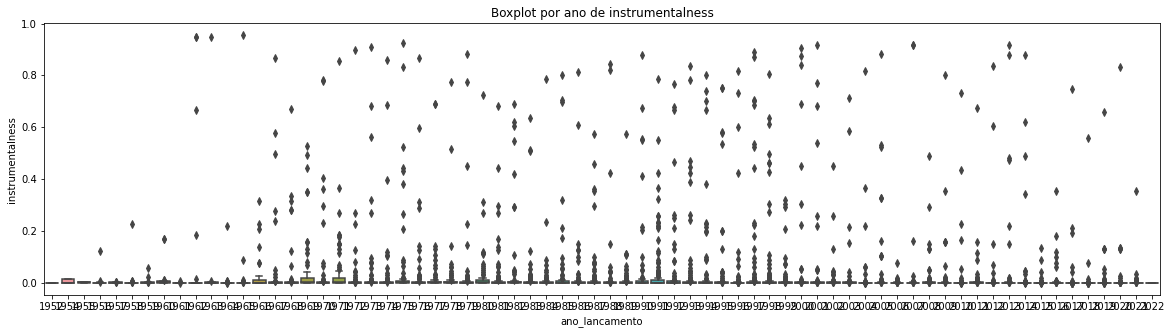

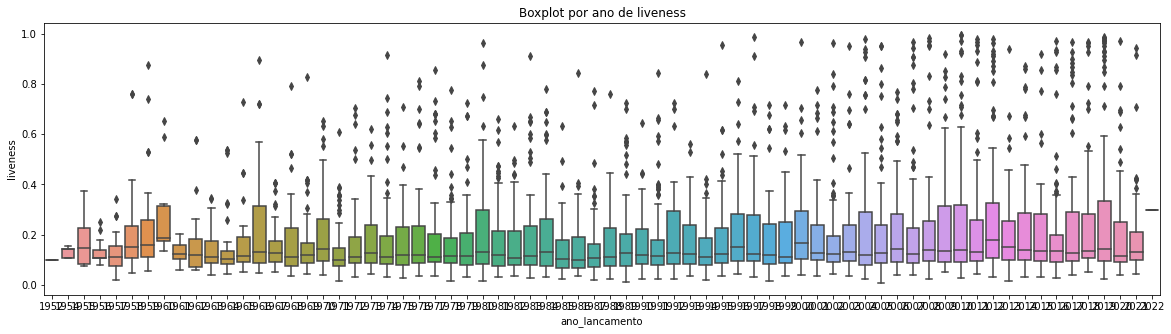

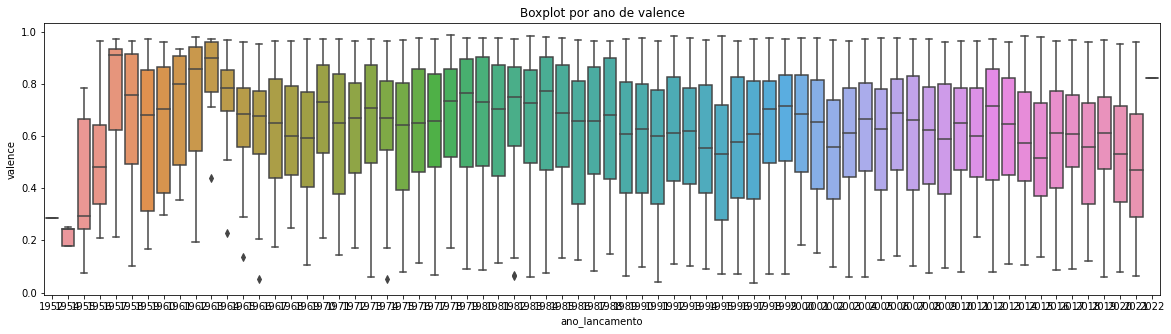

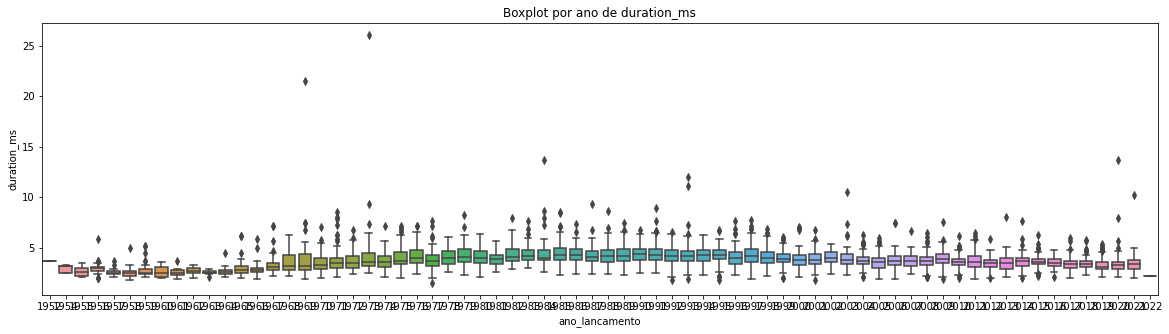

In [44]:
for serie in lista_series:

  serie = serie.sort_values(by="data_lancamento")
  serie["ano_lancamento"] = serie["data_lancamento"].dt.year
  #Pegando o nome da feature dessa serie
  feature = serie.columns[0]

  #Plot
  plt.figure(figsize=(20,5))
  g = sns.boxplot(x="ano_lancamento",y=feature,data=serie)
  plt.title("Boxplot por ano de %s"%feature)

  #Salvando imagem na pasta de imagens do drive
  nome = "serie_boxplot_" + feature + ".png"
  plt.savefig(path_img+nome)


## Decomposição de Série Temporal para cada feature

Vamos usar algumas ferramentas do módulo statsmodels para fazer essa decomposição. Usaremos ou seasonal_decompose, que se baseia em uma média móvel, ou Holt-Winters.

### Decomposição da Série Original

In [45]:
freq = 730
for serie in lista_series:  
  #Pegando nome da feature
  feature = serie.columns[0]

  #Um pouco de pre processamento para o metodo de decomposicao
  serie = serie.sort_values(by="data_lancamento")
  serie.set_index("data_lancamento",inplace=True)
  serie.index = pd.to_datetime(serie.index)
  serie = serie.fillna(method="ffill")
  
  #Decomposicao via método Seasonal Decompose (Medias Moveis)
  decomp = seasonal_decompose(serie,model="add",freq=freq)

  fig = plt.figure(figsize=(20,20))
  plt.suptitle("Decomposição por Médias Móveis de %s\n(intervalo %d dias)"%(str.upper(feature),freq),fontsize=14)
  plt.subplot(4,1,1)
  plt.plot(decomp.observed)
  plt.title('Série Original %s'%feature,fontsize=12)
  plt.subplot(4,1,2)
  plt.plot(decomp.trend)
  plt.title('Tendência %s'%feature,fontsize=12)
  plt.subplot(4,1,3)
  plt.plot(decomp.seasonal)
  plt.title('Sazonalidade %s'%feature,fontsize=12)
  plt.subplot(4,1,4)
  plt.plot(decomp.resid)
  plt.title('Resíduos %s'%feature,fontsize=12)

  fig.tight_layout()
  fig.subplots_adjust(top=0.93)
  plt.show()

  #Salvando imagem na pasta de imagens do drive
  nome = "decomp_serie_" + feature + ".png"
  fig.savefig(path_img+nome)


Output hidden; open in https://colab.research.google.com to view.

### Decomposição da Série Média

In [46]:
freq = 10
for serie in lista_series_media:  
  #Pegando nome da feature
  feature = serie.columns[0]
  
  #Decomposicao via método Seasonal Decompose (Medias Moveis)
  decomp = seasonal_decompose(serie,model="add",freq=freq)

  fig = plt.figure(figsize=(20,20))
  plt.suptitle("Decomposição por Médias Móveis da Média Anual de de %s\n(intervalo %d anos)"%(str.upper(feature),freq),fontsize=14)
  plt.subplot(4,1,1)
  plt.plot(decomp.observed)
  plt.title('Série Original %s'%feature,fontsize=12)
  plt.subplot(4,1,2)
  plt.plot(decomp.trend)
  plt.title('Tendência %s'%feature,fontsize=12)
  plt.subplot(4,1,3)
  plt.plot(decomp.seasonal)
  plt.title('Sazonalidade %s'%feature,fontsize=12)
  plt.subplot(4,1,4)
  plt.plot(decomp.resid)
  plt.title('Resíduos %s'%feature,fontsize=12)

  fig.tight_layout()
  fig.subplots_adjust(top=0.93)
  plt.show()

  #Salvando imagem na pasta de imagens do drive
  nome = "decomp_media_" + feature + ".png"
  fig.savefig(path_img+nome)


Output hidden; open in https://colab.research.google.com to view.

### Decomposição da Série Desvio Padrão

In [47]:
freq = 10
for serie in lista_series_std:  
  #Pegando nome da feature
  feature = serie.columns[0]
  serie = serie.fillna(method="ffill")
  serie = serie.fillna(serie.mean())
  #Decomposicao via método Seasonal Decompose (Medias Moveis)
  decomp = seasonal_decompose(serie,model="add",freq=freq)

  fig = plt.figure(figsize=(20,20))
  plt.suptitle("Decomposição por Médias Móveis do Desvio Padrão de %s\n(intervalo %d anos)"%(str.upper(feature),freq),fontsize=14)
  plt.subplot(4,1,1)
  plt.plot(decomp.observed)
  plt.title('Série Original de Desvio Padrão de %s'%feature,fontsize=12)
  plt.subplot(4,1,2)
  plt.plot(decomp.trend)
  plt.title('Tendência  de Desvio Padrão de %s'%feature,fontsize=12)
  plt.subplot(4,1,3)
  plt.plot(decomp.seasonal)
  plt.title('Sazonalidade  de Desvio Padrão de %s'%feature,fontsize=12)
  plt.subplot(4,1,4)
  plt.plot(decomp.resid)
  plt.title('Resíduos  de Desvio Padrão de %s'%feature,fontsize=12)

  fig.tight_layout()
  fig.subplots_adjust(top=0.93)
  plt.show()

  #Salvando imagem na pasta de imagens do drive
  nome = "decomp_std_" + feature + ".png"
  fig.savefig(path_img+nome)


Output hidden; open in https://colab.research.google.com to view.